In [1]:
import pandas as pd

In [2]:
movies=pd.read_csv("movies.csv")

In [3]:
ratings=pd.read_csv("ratings.csv")

In [4]:
links=pd.read_csv("links.csv")

In [5]:
tags=pd.read_csv("tags.csv")

In [6]:
movies.shape

(9742, 3)

In [7]:
ratings.shape

(100836, 4)

In [8]:
tags.shape

(3683, 4)

In [9]:
links.shape

(9742, 3)

In [10]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [13]:
ratings['userId'].nunique()

610

In [14]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [15]:
m_r_merge=pd.merge(movies,ratings,on="movieId")

In [16]:
m_r_merge

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [63]:
df=m_r_merge.groupby('title')['userId'].count().reset_index('title')

In [66]:


m_r_merge.drop_duplicates(subset='movieId').sort('rating', ascending = False).head(5)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [23]:
df.loc[df['rating'].idxmax()]

rating    329
Name: Forrest Gump (1994), dtype: int64

In [24]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [26]:
m_t_merge=pd.merge(movies,tags,on="movieId")

In [27]:
m_t_merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [45]:
m_t_merge[m_t_merge['title'].str.contains("Matrix")]

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


In [52]:
df3=m_r_merge[m_r_merge['title'].str.contains('Terminator 2')]

In [54]:
df3['rating'].mean()

3.970982142857143

In [55]:
df4=m_r_merge[m_r_merge['title'].str.contains('Fight Club')]

In [57]:
import matplotlib.pyplot as plt

In [58]:
df4

,movieId,title,genres,userId,rating,timestamp
49835,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282
49836,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4,2.0,945078528
49837,2959,Fight Club (1999),Action|Crime|Drama|Thriller,10,0.5,1455356582
49838,2959,Fight Club (1999),Action|Crime|Drama|Thriller,15,2.5,1510571747
49839,2959,Fight Club (1999),Action|Crime|Drama|Thriller,16,3.5,1377476874
...,...,...,...,...,...,...
50048,2959,Fight Club (1999),Action|Crime|Drama|Thriller,601,5.0,1441639461
50049,2959,Fight Club (1999),Action|Crime|Drama|Thriller,603,4.0,963176105
50050,2959,Fight Club (1999),Action|Crime|Drama|Thriller,606,5.0,1171231517
50051,2959,Fight Club (1999),Action|Crime|Drama|Thriller,608,5.0,1117336631


{'whiskers': [<matplotlib.lines.Line2D at 0x23a94c67f20>,
 'caps': [<matplotlib.lines.Line2D at 0x23a94c660f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a94c667e0>],
 'medians': [<matplotlib.lines.Line2D at 0x23a94c32150>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a94c33410>],
 'means': []}

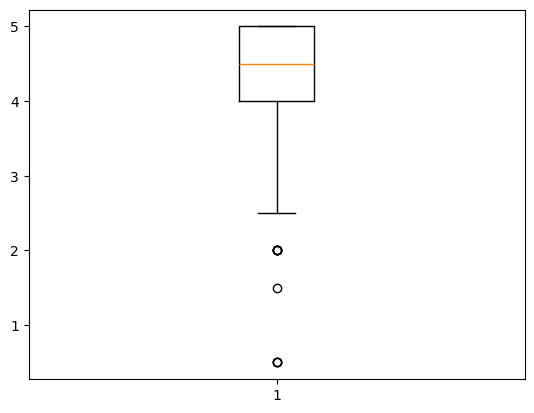

In [59]:
plt.boxplot(df4['rating'])

In [67]:
data2 = m_r_merge.query("rating == 5")
print(data2["title"].value_counts().head(10))

title
Shawshank Redemption, The (1994)             153
Pulp Fiction (1994)                          123
Forrest Gump (1994)                          116
Matrix, The (1999)                           109
Star Wars: Episode IV - A New Hope (1977)    104
Schindler's List (1993)                       92
Silence of the Lambs, The (1991)              92
Godfather, The (1972)                         88
Fight Club (1999)                             81
Braveheart (1995)                             80
Name: count, dtype: int64


In [68]:
m_r_merge

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [82]:
data3 = ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()


In [83]:
data3

,movieId,count,mean_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [84]:
join=pd.merge(movies,data3,how='inner')

In [85]:
join

,movieId,title,genres,count,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [86]:
filterd_data=join[join['count']>50]

In [87]:
filterd_data

,movieId,title,genres,count,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [88]:
filterd_data[filterd_data['mean_rating']==filterd_data['mean_rating'].max()]

,movieId,title,genres,count,mean_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


In [90]:
data5=filterd_data.sort_values('count',ascending=False)

In [92]:
data5[data5['genres'].str.contains('Sci-Fi')]

,movieId,title,genres,count,mean_rating
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [93]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [94]:
!pip install pandas requests beautifulsoup4 lxml



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:

import requests
from bs4 import BeautifulSoup


In [96]:
r_l_merge=pd.merge(links,data5,on='movieId')

In [97]:
r_l_merge

,movieId,imdbId,tmdbId,title,genres,count,mean_rating
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,6,113277,949.0,Heat (1995),Action|Crime|Thriller,102,3.946078
4,7,114319,11860.0,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...,...,...
431,106782,993846,106646.0,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
432,109374,2278388,120467.0,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
433,109487,816692,157336.0,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
434,112852,2015381,118340.0,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [323]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text,'html.parser')
    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
    return imdb_rating.text if imdb_rating else np.nan

In [215]:
data=r_l_merge['imdbId']

In [310]:
r_l_merge.loc[5,'IMDB RATING']=scrapper(data.iloc[5])

In [366]:
for i in range(421,436):
    r_l_merge.loc[i,'IMDB RATING']=scrapper(data.iloc[i])

In [367]:
r_l_merge.head(436)

,movieId,imdbId,tmdbId,title,genres,count,mean_rating,IMDB RATING
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,8.3
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,7.1
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,6.7
3,6,113277,949.0,Heat (1995),Action|Crime|Thriller,102,3.946078,8.3
4,7,114319,11860.0,Sabrina (1995),Comedy|Romance,54,3.185185,6.3
...,...,...,...,...,...,...,...,...
431,106782,993846,106646.0,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,8.2
432,109374,2278388,120467.0,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,8.1
433,109487,816692,157336.0,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,8.7
434,112852,2015381,118340.0,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,8.0


In [376]:
d[d['IMDB RATING'].str.contains(d['IMDB RATING'].max())]

,movieId,imdbId,tmdbId,title,genres,count,mean_rating,IMDB RATING
424,79132,1375666,27205.0,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,8.8


In [375]:
d=r_l_merge[r_l_merge['genres'].str.contains('Sci-Fi')]